In [8]:
import pandas as pd
import os,sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

### Comparison of parameter estimation using: Bayesian Hieararchicael model (BHM) and Maximum Likelihood Estimation (MLE)

In [9]:
def compute_correlations(x, y):
    # Compute Pearson correlation
    pearson_r, pearson_p = pearsonr(x, y)
    pearson_r2 = pearson_r ** 2
    # Compute Spearman correlation
    spearman_r, spearman_p = spearmanr(x, y)
    spearman_r2 = spearman_r ** 2
    return {'Pearson': {'r': pearson_r, 'r^2': pearson_r2, 'p-value': pearson_p},
            'Spearman': {'r': spearman_r, 'r^2': spearman_r2, 'p-value': spearman_p}}

In [10]:
utility_dir = '/Volumes/UCDN/datasets/IDM/utility/'
split_fn = os.path.join(utility_dir,'split_CDD_analysis.csv')
df_mle = pd.read_csv(split_fn,index_col=0)
df_mle[['subject','kappa','gamma']]

,subject,kappa,gamma
0,23_IDM_0001,0.006216,0.308757
1,23_IDM_0002,0.067843,0.184938
2,23_IDM_0003,0.017471,0.688092
3,23_IDM_0004,0.082490,0.301069
4,23_IDM_0005,0.008620,0.952557
...,...,...,...
144,23_IDM_0145,0.003205,0.436531
145,23_IDM_0146,0.002200,1.321490
146,23_IDM_0147,0.120570,0.351265
147,23_IDM_0148,0.048817,0.303591


In [11]:
def extract_mean(fn,var_names=['kappa','gamma'],nb_subjects=149):
    df = pd.read_csv(fn,index_col=0)
    df_bhm = pd.DataFrame([],columns=var_names)
    for var in var_names:
        ind_list = ['{}[{}]'.format(var,sub_id) for sub_id in range(nb_subjects)]
        df_bhm[var] = df.loc[df.index.isin(ind_list)]['mean'].reset_index(drop=True)
    return df_bhm

In [12]:
bhm_dir = '/Volumes/UCDN/datasets/IDM/BH/csv'
bhm_fn = os.path.join(bhm_dir,'BHM_model_summary.hyperpriors.csv')
df_bhm = extract_mean(bhm_fn,var_names=['kappa','gamma'],nb_subjects=df_mle.shape[0])
df_bhm


,kappa,gamma
0,0.006721,0.318727
1,0.071867,0.187886
2,0.017565,0.638282
3,0.084361,0.303792
4,0.008745,0.786782
...,...,...
144,0.003280,0.436822
145,0.000795,1.007360
146,0.118884,0.355378
147,0.050936,0.307536


In [13]:
def plot_correlation(df_mle,df_bhm,idx=1,var='kappa'):
    plt.figure(idx)
    x = np.log(df_mle[var])
    y = np.log(df_bhm[var])
    plt.scatter(x, y)
    plt.xlabel('log {} (MLE)'.format(var))
    plt.ylabel('log {} (BHM)'.format(var))
    corr = compute_correlations(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b,"r-")
    plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

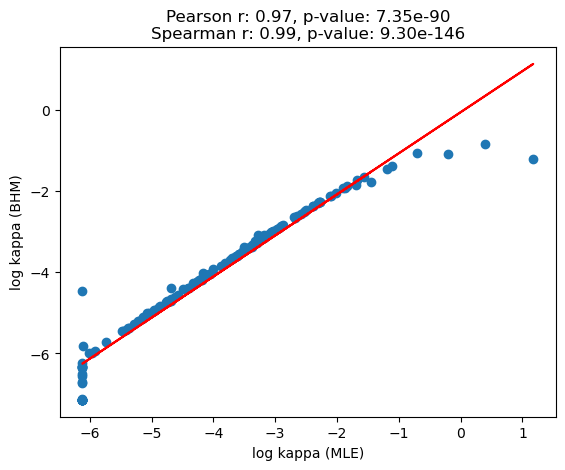

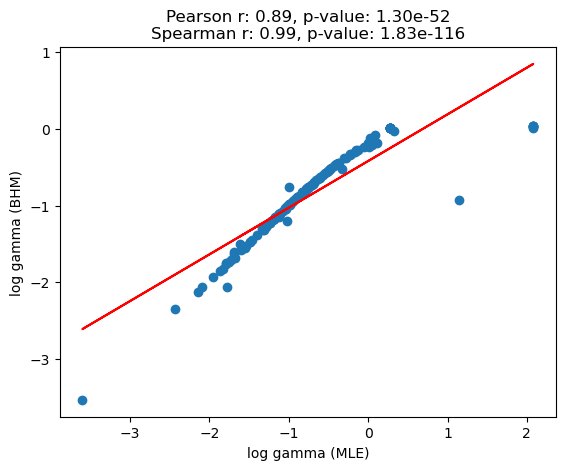

In [14]:
var_names=['kappa','gamma']
for idx,var in enumerate(var_names):
    plot_correlation(df_mle,df_bhm,idx=idx,var=var)